In [1]:
print('ABBAS KIZIL CS210 PROJECT WHOLE STEPS')

ABBAS KIZIL CS210 PROJECT WHOLE STEPS


# FIRST DATASET

In [2]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [6]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [35]:
filename = "Stock Market Dataset.csv"
df_tesla_price = pd.read_csv(join(path_prefix, filename))

In [36]:
df_tesla_price.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [37]:
df_tesla_price = df_tesla_price[['Date', 'Tesla_Price', 'Tesla_Vol.']]
df_tesla_price.head()

,Date,Tesla_Price,Tesla_Vol.
0,02-02-2024,187.91,110610000.0
1,01-02-2024,188.86,90680000.0
2,31-01-2024,187.29,102270000.0
3,30-01-2024,191.59,105540000.0
4,29-01-2024,190.93,123600000.0


In [39]:
df_tesla_price.rename(columns = {'Tesla_Price':'tesla_price'}, inplace = True)
df_tesla_price.rename(columns = {'Tesla_Vol.':'tesla_volume'}, inplace = True)
df_tesla_price.head()

,Date,tesla_price,tesla_volume
0,2024-02-02,187.91,110610000.0
1,2024-02-01,188.86,90680000.0
2,2024-01-31,187.29,102270000.0
3,2024-01-30,191.59,105540000.0
4,2024-01-29,190.93,123600000.0


In [11]:
print(df_tesla_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1243 non-null   object 
 1   tesla_price   1243 non-null   float64
 2   tesla_volume  1243 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.3+ KB
None


In [12]:
print(df_tesla_price.describe())

       tesla_price  tesla_volume
count  1243.000000  1.243000e+03
mean    173.590442  1.341790e+08
std     106.688094  8.509129e+07
min      11.930000  2.940000e+07
25%      53.335000  8.136000e+07
50%     202.070000  1.095200e+08
75%     251.470000  1.578300e+08
max     409.970000  9.140800e+08


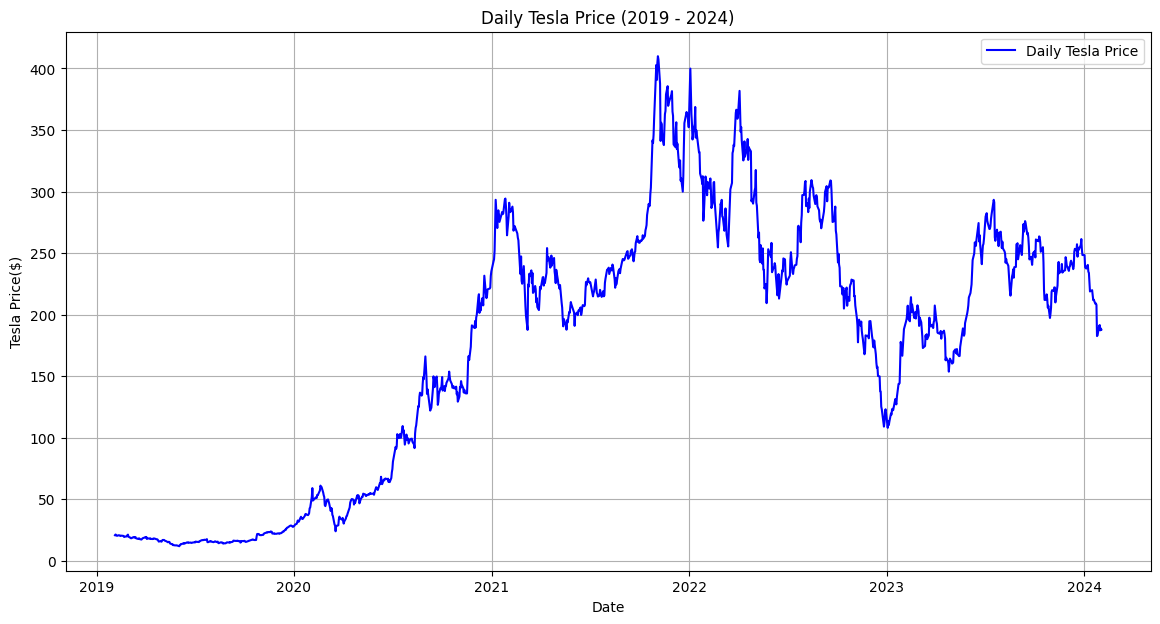

In [23]:
# Ensure 'Date' is in datetime format and set as index if not already
df_tesla_price['Date'] = pd.to_datetime(df_tesla_price['Date'], format='%d-%m-%Y')
df_tesla_price.set_index('Date', inplace=True)

#plotting daily tesla price
plt.figure(figsize = (14, 7))
plt.plot(df_tesla_price['tesla_price'], label='Daily Tesla Price', color = 'blue')
plt.title('Daily Tesla Price (2019 - 2024)')
plt.xlabel ('Date')
plt.ylabel ('Tesla Price($)')
plt.legend()
plt.grid(True)
plt.show()

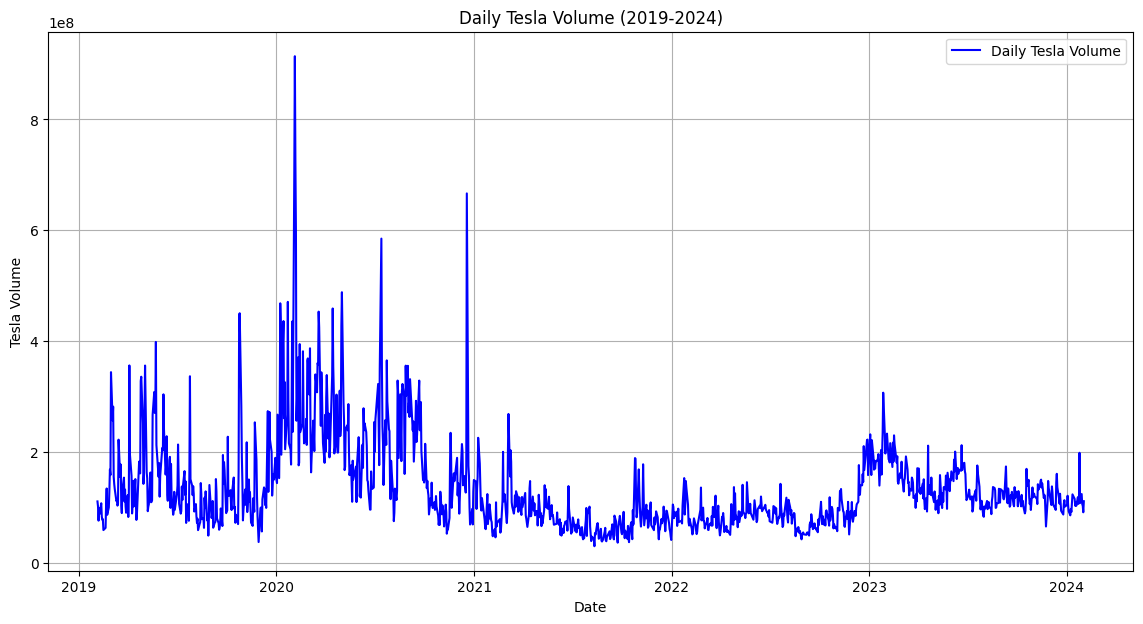

In [15]:
# Plotting daily oil price
plt.figure(figsize=(14, 7))
plt.plot(df_tesla_price['tesla_volume'], label='Daily Tesla Volume', color='blue')
plt.title('Daily Tesla Volume (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Tesla Volume')
plt.legend()
plt.grid(True)
plt.show()

# SECOND DATASET


In [24]:
filename2 = "naturalgas.csv"
df_gas_price = pd.read_csv(join(path_prefix, filename2))

In [25]:
df_gas_price.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,2.142,197601,2.031,2.160,2.012
1,05/02/2024,2.035,143150,1.931,2.050,1.927
2,05/01/2024,1.932,128497,1.954,1.970,1.913
3,04/30/2024,1.991,140670,2.050,2.092,1.951
4,04/29/2024,2.030,149879,1.923,2.056,1.916


In [26]:
print(df_gas_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   int64  
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB
None


In [ ]:
print(df_gas_price.describe(include= 'all'))

              Date   Close/Last         Volume         Open         High  \
count         1259  1259.000000    1259.000000  1259.000000  1259.000000   
unique        1259          NaN            NaN          NaN          NaN   
top     05/03/2024          NaN            NaN          NaN          NaN   
freq             1          NaN            NaN          NaN          NaN   
mean           NaN     3.462338  122184.793487     3.468806     3.575736   
std            NaN     1.864792   58690.743136     1.867315     1.948858   
min            NaN     1.482000    1200.000000     1.441000     1.567000   
25%            NaN     2.267000   88616.500000     2.271000     2.315500   
50%            NaN     2.669000  121130.000000     2.675000     2.736000   
75%            NaN     4.060000  157984.000000     4.087500     4.198000   
max            NaN     9.680000  349121.000000     9.817000    10.028000   

                Low  
count   1259.000000  
unique          NaN  
top             NaN  

In [ ]:
df_gas_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        497 non-null    datetime64[ns]
 1   Close/Last  497 non-null    float64       
 2   Volume      497 non-null    int64         
 3   Open        497 non-null    float64       
 4   High        497 non-null    float64       
 5   Low         497 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.2 KB


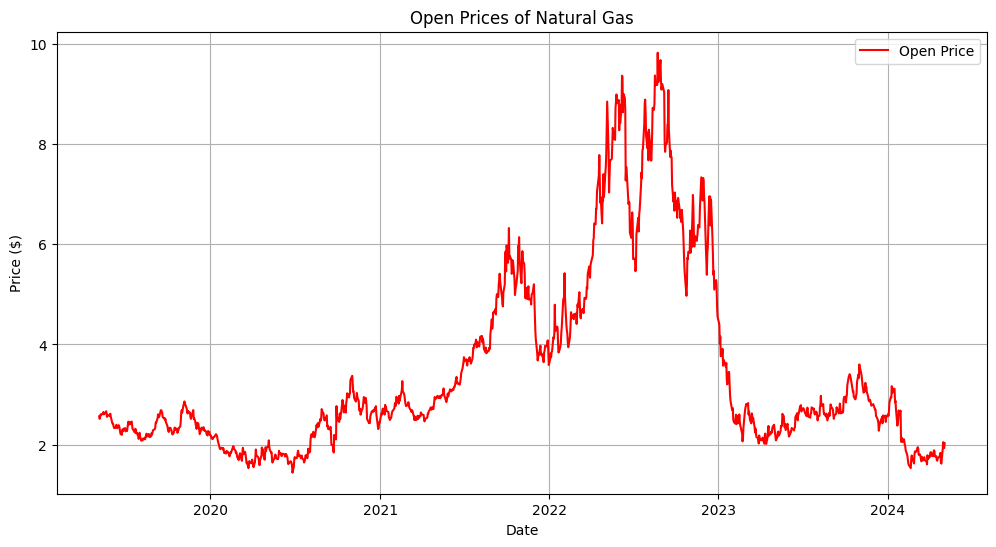

In [29]:
# Convert the 'Date' column to datetime format
df_gas_price['Date'] = pd.to_datetime(df_gas_price['Date'])

# Plotting the 'Open' prices
plt.figure(figsize=(12, 6))
plt.plot(df_gas_price['Date'], df_gas_price['Open'], label='Open Price', color='red')
plt.title('Open Prices of Natural Gas')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# DAILY TO MONTHLY DATA


In [47]:
# Convert the 'Date' column to datetime and sort the data by date
df_tesla_price['Date'] = pd.to_datetime(df_tesla_price['Date'], format='%d-%m-%Y')
tesla_data_sorted = df_tesla_price.sort_values('Date')

# Filter the data for the period from March 2019 to December 2023
filtered_tesla_data = tesla_data_sorted[(tesla_data_sorted['Date'] >= '2019-03-01') &
                                        (tesla_data_sorted['Date'] <= '2023-12-31')]

# Resample the data to get monthly average prices
monthly_tesla_data = filtered_tesla_data.set_index('Date').resample('M').mean()

monthly_tesla_data.reset_index(inplace=True)
monthly_tesla_data.head()

,Date,tesla_price,tesla_volume
0,2019-03-31,18.516667,1.527086e+08
1,2019-04-30,17.776190,1.648271e+08
2,2019-05-31,14.646818,1.926818e+08
3,2019-06-30,14.248000,1.612275e+08
4,2019-07-31,16.159091,1.359359e+08


# Monthly data of Tesla Price vs Date



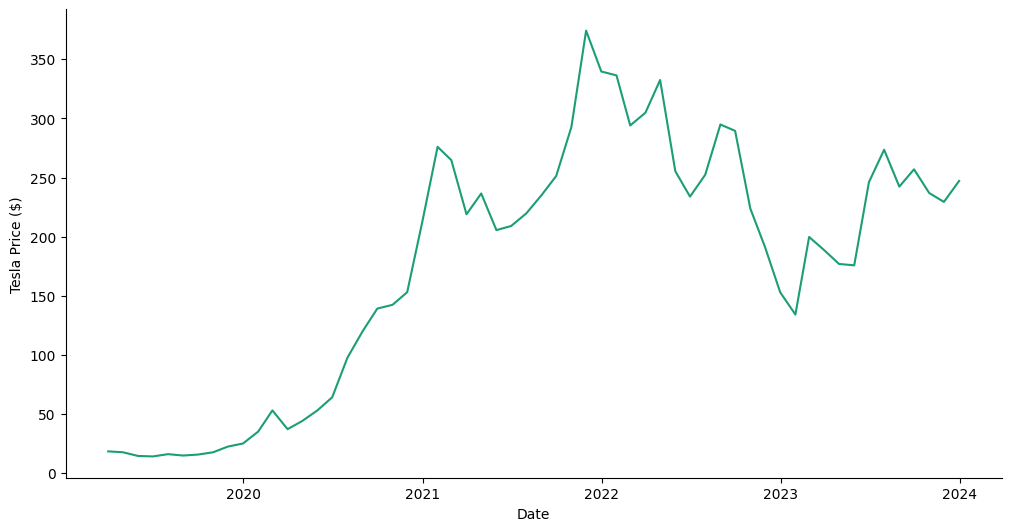

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['tesla_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_series(monthly_tesla_data, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Tesla Price ($)')

#Monthly data of Tesla Volume vs Date

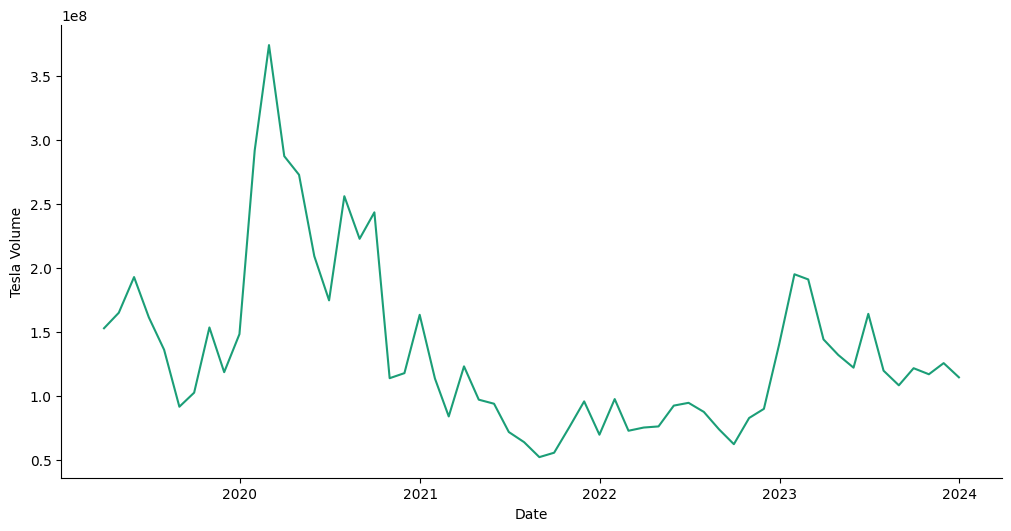

In [49]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['tesla_volume']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_series(monthly_tesla_data, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Tesla Volume')

Checking missing values and if there are fixing it. But we do not have missing value. We arrange monthly data by considering mean of the data.

In [50]:
# Calculate the percentage of missing values for each column in df_oil_price
missing_percentage_oil_price = monthly_tesla_data.isnull().mean() * 100
print("Percentage of missing values in monthly_oil_price:")
print(missing_percentage_oil_price)

# Calculate the percentage of missing values for each column in df_oil_price
missing_percentage_oil_price = monthly_tesla_data.isnull().mean() * 100
print("Percentage of missing values in monthly_oil_price:")
print(missing_percentage_oil_price)



Percentage of missing values in monthly_oil_price:
Date            0.0
tesla_price     0.0
tesla_volume    0.0
dtype: float64


# Monthly data of NATURAL Gas
# Monthly natural gas vs date

In [58]:
import pandas as pd

# Assuming df_gas_price is your DataFrame
# Convert the 'Date' column to datetime and sort the data by date
df_gas_price['Date'] = pd.to_datetime(df_gas_price['Date'], format='%d-%m-%Y')
gas_data_sorted = df_gas_price.sort_values('Date')

# Filter the data for the period from March 2019 to December 2023
filtered_gas_data = gas_data_sorted[(gas_data_sorted['Date'] >= '2019-03-01') &
                                    (gas_data_sorted['Date'] <= '2023-12-31')]

# Resample the data to get monthly average prices
monthly_gas_data = filtered_gas_data.set_index('Date').resample('M')['Open'].mean()

# Reset the index to make 'Date' a column again
monthly_gas_data = monthly_gas_data.reset_index()

# Display the first few rows
print(monthly_gas_data.head())

        Date      Open
0 2019-05-31  2.597053
1 2019-06-30  2.337500
2 2019-07-31  2.310000
3 2019-08-31  2.167364
4 2019-09-30  2.524500


In [56]:
# Calculate the percentage of missing values for each column in df_oil_price
missing_percentage_gas_price = monthly_gas_data.isnull().mean() * 100
print("Percentage of missing values in monthly_oil_price:")
print(missing_percentage_gas_price)

Percentage of missing values in monthly_oil_price:
0.0


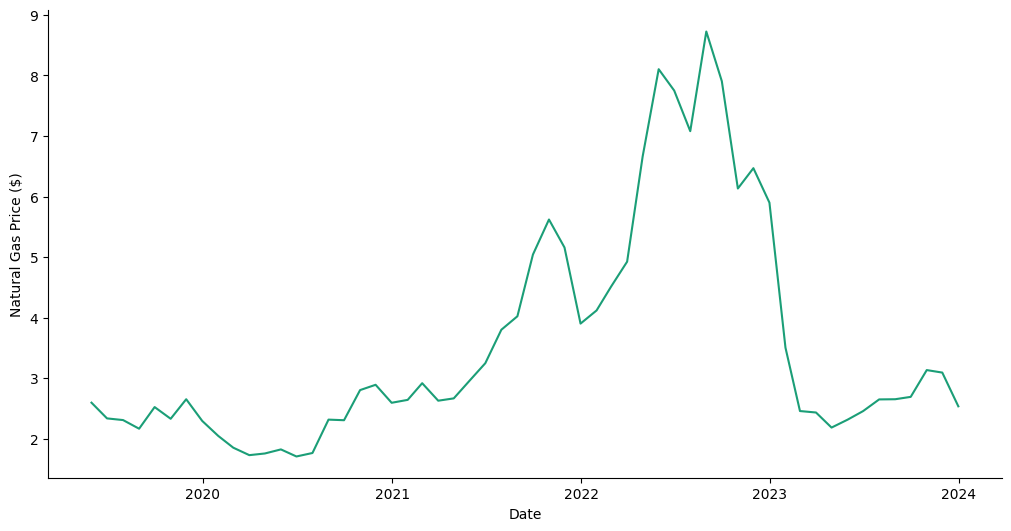

In [59]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_series(monthly_gas_data, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Natural Gas Price ($)')

# Scatter Plot

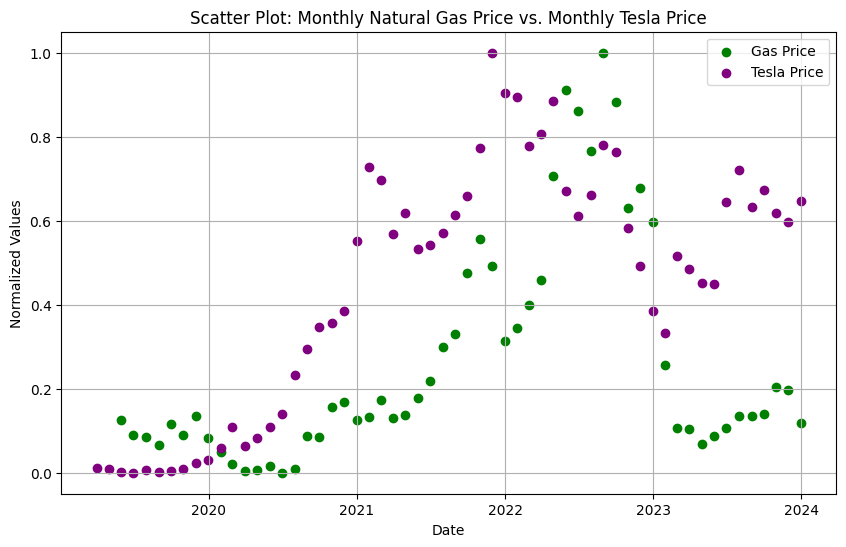

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframes are named monthly_gas_data and monthly_tesla_data

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()

# Normalize gas prices
monthly_gas_data['Normalized_Open'] = scaler.fit_transform(monthly_gas_data[['Open']])

# Normalize Tesla prices
monthly_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(monthly_tesla_data[['tesla_price']])

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.scatter(monthly_gas_data['Date'], monthly_gas_data['Normalized_Open'], color='green', label='Gas Price')
plt.scatter(monthly_tesla_data['Date'], monthly_tesla_data['Normalized_Tesla_Price'], color='purple', label='Tesla Price')

plt.title('Scatter Plot: Monthly Natural Gas Price vs. Monthly Tesla Price')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-63-f5447372d3ef>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])


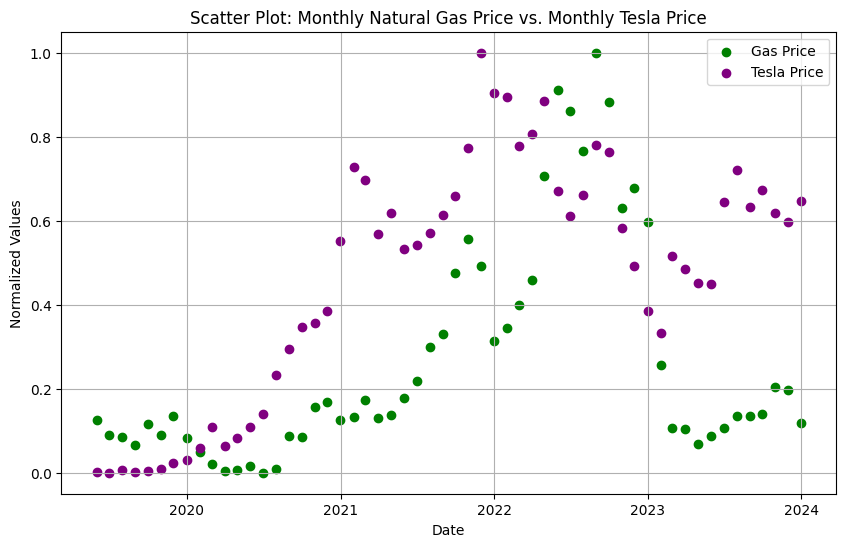

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframes are named monthly_gas_data and monthly_tesla_data

# Convert the 'Date' columns to datetime if not already done
monthly_gas_data['Date'] = pd.to_datetime(monthly_gas_data['Date'])
monthly_tesla_data['Date'] = pd.to_datetime(monthly_tesla_data['Date'])

# Find the common date range
start_date = max(monthly_gas_data['Date'].min(), monthly_tesla_data['Date'].min())
end_date = min(monthly_gas_data['Date'].max(), monthly_tesla_data['Date'].max())

# Filter the data to the common date range
filtered_gas_data = monthly_gas_data[(monthly_gas_data['Date'] >= start_date) &
                                     (monthly_gas_data['Date'] <= end_date)]
filtered_tesla_data = monthly_tesla_data[(monthly_tesla_data['Date'] >= start_date) &
                                         (monthly_tesla_data['Date'] <= end_date)]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()

# Normalize gas prices
filtered_gas_data['Normalized_Open'] = scaler.fit_transform(filtered_gas_data[['Open']])

# Normalize Tesla prices
filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gas_data['Date'], filtered_gas_data['Normalized_Open'], color='green', label='Gas Price')
plt.scatter(filtered_tesla_data['Date'], filtered_tesla_data['Normalized_Tesla_Price'], color='purple', label='Tesla Price')

plt.title('Scatter Plot: Monthly Natural Gas Price vs. Monthly Tesla Price')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-75-2d8d9d2d2315>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])
<ipython-input-75-2d8d9d2d2315>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tesla_data['Normalized_Tesla_Volume'] = scaler.fit_transform(filtered_tesla_data[['tesla_volume']])


        Date  tesla_price  tesla_volume  Normalized_Tesla_Price  \
0 2019-05-31    14.646818  1.926818e+08                0.001108   
1 2019-06-30    14.248000  1.612275e+08                0.000000   
2 2019-07-31    16.159091  1.359359e+08                0.005309   
3 2019-08-31    15.006364  9.143545e+07                0.002107   
4 2019-09-30    15.817000  1.024220e+08                0.004359   

   Normalized_Tesla_Volume      Open  Normalized_Open  
0                 0.436990  2.597053         0.126590  
1                 0.339225  2.337500         0.089594  
2                 0.260614  2.310000         0.085674  
3                 0.122299  2.167364         0.065342  
4                 0.156447  2.524500         0.116249  


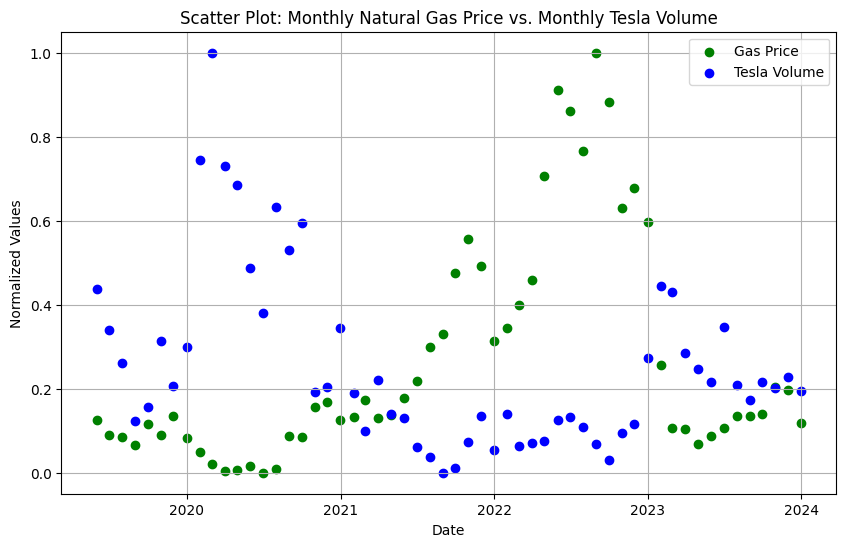

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframes are named monthly_gas_data and monthly_tesla_data

# Convert the 'Date' columns to datetime if not already done
monthly_gas_data['Date'] = pd.to_datetime(monthly_gas_data['Date'])
monthly_tesla_data['Date'] = pd.to_datetime(monthly_tesla_data['Date'])

# Find the common date range
start_date = max(monthly_gas_data['Date'].min(), monthly_tesla_data['Date'].min())
end_date = min(monthly_gas_data['Date'].max(), monthly_tesla_data['Date'].max())

# Filter the data to the common date range
filtered_gas_data = monthly_gas_data[(monthly_gas_data['Date'] >= start_date) &
                                     (monthly_gas_data['Date'] <= end_date)]
filtered_tesla_data = monthly_tesla_data[(monthly_tesla_data['Date'] >= start_date) &
                                         (monthly_tesla_data['Date'] <= end_date)]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()

# Normalize gas prices
filtered_gas_data['Normalized_Open'] = scaler.fit_transform(filtered_gas_data[['Open']])

# Normalize Tesla prices
filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])

# Normalize Tesla volumes
filtered_tesla_data['Normalized_Tesla_Volume'] = scaler.fit_transform(filtered_tesla_data[['tesla_volume']])

# Merge the datasets on 'Date'
merged_data = pd.merge(filtered_tesla_data, filtered_gas_data, on='Date', how='inner')

# Display the merged data
print(merged_data.head())

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Date'], merged_data['Normalized_Open'], color='green', label='Gas Price')
plt.scatter(merged_data['Date'], merged_data['Normalized_Tesla_Volume'], color='blue', label='Tesla Volume')

plt.title('Scatter Plot: Monthly Natural Gas Price vs. Monthly Tesla Volume')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


# Hypothesis Testing


Hypothesis 1: Impact of Natural Price on Tesla Stock Market Price

Null Hypothesis (H0): There is no correlation between Tesla Stock Prices and Natural gas prices

Alternative Hypothesis (H1): There is significant correlation between Tesla Stock Price and Natural gas prices

Hypothesis 2: Impact of Natural Price on Tesla Stock Market Volume

Null Hypothesis (H1): There is a significant correlation between monthly oil volumes traded and the total quantity of oil imported.

Alternative Hypothesis (H0): There is no correlation between monthly oil volumes traded and the total quantity of oil imported.

In [76]:
print(merged_data.head())

        Date  tesla_price  tesla_volume  Normalized_Tesla_Price  \
0 2019-05-31    14.646818  1.926818e+08                0.001108   
1 2019-06-30    14.248000  1.612275e+08                0.000000   
2 2019-07-31    16.159091  1.359359e+08                0.005309   
3 2019-08-31    15.006364  9.143545e+07                0.002107   
4 2019-09-30    15.817000  1.024220e+08                0.004359   

   Normalized_Tesla_Volume      Open  Normalized_Open  
0                 0.436990  2.597053         0.126590  
1                 0.339225  2.337500         0.089594  
2                 0.260614  2.310000         0.085674  
3                 0.122299  2.167364         0.065342  
4                 0.156447  2.524500         0.116249  


In [78]:
from scipy.stats import pearsonr

# Test hypothesis 1: Correlation between natural prices and tesla stock market price
corr_price_tprice, p_value_price_tprice = pearsonr(merged_data['Open'], merged_data['tesla_price'])
print("Correlation coefficient (Gas Price vs. Tesla Stock Market Price):", corr_price_tprice)
print("P-value (Gas Price vs. Tesla Stock Market Price):", p_value_price_tprice)

# Test hypothesis 1: Correlation between natural prices and tesla stock market volume
corr_price_volume, p_value_price_volume = pearsonr(merged_data['Open'], merged_data['tesla_volume'])
print("Correlation coefficient (Volume vs. Quantity):", corr_price_volume)
print("P-value (Volume vs. Quantity):", p_value_price_volume)

Correlation coefficient (Gas Price vs. Tesla Stock Market Price): 0.5688990563597923
P-value (Gas Price vs. Tesla Stock Market Price): 4.7690966492194804e-06
Correlation coefficient (Volume vs. Quantity): -0.5546484114067304
P-value (Volume vs. Quantity): 9.177919656378768e-06


In [77]:
from scipy.stats import pearsonr

# Test hypothesis 1: Correlation between natural prices and tesla stock market price
corr_price_tprice, p_value_price_tprice = pearsonr(merged_data['Normalized_Open'], merged_data['Normalized_Tesla_Price'])
print("Correlation coefficient (Gas Price vs. Tesla Stock Market Price):", corr_price_tprice)
print("P-value (Gas Price vs. Tesla Stock Market Price):", p_value_price_tprice)

# Test hypothesis 1: Correlation between natural prices and tesla stock market volume
corr_price_volume, p_value_price_volume = pearsonr(merged_data['Normalized_Open'], merged_data['Normalized_Tesla_Volume'])
print("Correlation coefficient (Volume vs. Quantity):", corr_price_volume)
print("P-value (Volume vs. Quantity):", p_value_price_volume)

Correlation coefficient (Gas Price vs. Tesla Stock Market Price): 0.5688990563597923
P-value (Gas Price vs. Tesla Stock Market Price): 4.7690966492194804e-06
Correlation coefficient (Volume vs. Quantity): -0.5546484114067304
P-value (Volume vs. Quantity): 9.177919656378768e-06


# Natural Gas Price vs. Tesla Stock Market Price:

**Our correlation coefficient is 0.568**. This suggests a strong positive correlation between natural gas prices and tesla stock market prices. As natural gas prices prices increase, there seems to be a increase in tesla price.

**P-value is 4.7690966492194804e-06.** This p-value is less than the commonly used significance level of 0.05, which means the correlation is statistically significant. You have sufficient evidence to reject the null hypothesis (H0) that there is no correlation between oil prices and the total quantity of oil imported.

Natural Gas Price vs. Tesla Stock Market Volume:

**Correlation coefficient is -0.554.** Between Natural Gas price and Tesla Stock Market Volume indicates a moderate negative linear relationship between these two variables. This means that as the Volume increases, the gas price tends to decrease, and vice versa. Moreover the coefficient suggests that there is a noticeable but not extremely strong inverse relationship between the two variables.


**P-value is 9.177919656378768e-06.** Since this p-value is  below 0.05, the result is statistically significant, providing enough evidence to reject the null hypothesis that there is no correlation between oil volumes traded and the total quantity of oil imported.

In [79]:
monthly_tesla_data.head()

,Date,tesla_price,tesla_volume,Normalized_Tesla_Price
0,2019-03-31,18.516667,1.527086e+08,0.011859
1,2019-04-30,17.776190,1.648271e+08,0.009802
2,2019-05-31,14.646818,1.926818e+08,0.001108
3,2019-06-30,14.248000,1.612275e+08,0.000000
4,2019-07-31,16.159091,1.359359e+08,0.005309


In [80]:
merged_data.head()

,Date,tesla_price,tesla_volume,Normalized_Tesla_Price,Normalized_Tesla_Volume,Open,Normalized_Open
0,2019-05-31,14.646818,1.926818e+08,0.001108,0.436990,2.597053,0.126590
1,2019-06-30,14.248000,1.612275e+08,0.000000,0.339225,2.337500,0.089594
2,2019-07-31,16.159091,1.359359e+08,0.005309,0.260614,2.310000,0.085674
3,2019-08-31,15.006364,9.143545e+07,0.002107,0.122299,2.167364,0.065342
4,2019-09-30,15.817000,1.024220e+08,0.004359,0.156447,2.524500,0.116249


Defining the Hypothesis

Null Hypothesis (H0): There is no difference in the mean price of tesla between months with high tesla prices and months with low tesla prices.

Alternative Hypothesis (H1): There is a significant difference in the mean gas price between months with high gas prices and months with low gas prices.

In [81]:
# Calculate the median oil price
median_price = merged_data['Normalized_Tesla_Price'].median()

# Define high and low price groups
high_price_data = merged_data[merged_data['Normalized_Tesla_Price'] > median_price]['Normalized_Open']
low_price_data = merged_data[merged_data['Normalized_Tesla_Price'] <= median_price]['Normalized_Open']


In [82]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(high_price_data, low_price_data, equal_var=False)  # equal_var=False if variances might be unequal

print("T-Statistic:", t_stat)
print("P-value:", p_value)


T-Statistic: 4.328696271817639
P-value: 9.12625374215195e-05


The T-statistic of 4.329 and the very small p-value indicate that the correlation you are examining is statistically significant.
There is strong evidence to suggest that the observed correlation is real and not due to random chance.

In [84]:
# Calculate the median oil price
median_price = merged_data['Normalized_Tesla_Volume'].median()

# Define high and low price groups
high_price_data2 = merged_data[merged_data['Normalized_Tesla_Volume'] > median_price]['Normalized_Open']
low_price_data2 = merged_data[merged_data['Normalized_Tesla_Volume'] <= median_price]['Normalized_Open']


In [85]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(high_price_data2, low_price_data2, equal_var=False)  # equal_var=False if variances might be unequal

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: -5.3158244470466025
P-value: 6.0489201467104225e-06


Statistical Significance: The very small p-value (0.00000605) indicates that the correlation observed in your data is statistically significant. This means there is strong evidence to reject the null hypothesis, which would usually state that there is no correlation between the variables.
Strength of Evidence: The T-statistic of -5.316 further supports this conclusion. The high absolute value of the T-statistic indicates that the observed data is far from what we would expect under the null hypothesis, providing strong evidence that the correlation is not zero. In practical terms, I am confident that there is a meaningful negative relationship between the variables that ı am studying, based on my datasets. This negative correlation suggests that as one variable increases, the other tends to decrease.

In [87]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframes are named monthly_gas_data and monthly_tesla_data

# Convert the 'Date' columns to datetime if not already done
monthly_gas_data['Date'] = pd.to_datetime(monthly_gas_data['Date'])
monthly_tesla_data['Date'] = pd.to_datetime(monthly_tesla_data['Date'])

# Find the common date range
start_date = max(monthly_gas_data['Date'].min(), monthly_tesla_data['Date'].min())
end_date = min(monthly_gas_data['Date'].max(), monthly_tesla_data['Date'].max())

# Filter the data to the common date range
filtered_gas_data = monthly_gas_data[(monthly_gas_data['Date'] >= start_date) &
                                     (monthly_gas_data['Date'] <= end_date)]
filtered_tesla_data = monthly_tesla_data[(monthly_tesla_data['Date'] >= start_date) &
                                         (monthly_tesla_data['Date'] <= end_date)]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()

# Normalize gas prices
filtered_gas_data['Normalized_Open'] = scaler.fit_transform(filtered_gas_data[['Open']])

# Normalize Tesla prices
filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])

# Normalize Tesla volumes
filtered_tesla_data['Normalized_Tesla_Volume'] = scaler.fit_transform(filtered_tesla_data[['tesla_volume']])

# Merge the datasets on 'Date'
merged_data = pd.merge(filtered_tesla_data, filtered_gas_data, on='Date', how='inner')

# Define the dependent and independent variables
X = sm.add_constant(merged_data['tesla_price'])  # Add a constant to the independent variable
Y = merged_data['Open']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     25.84
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.77e-06
Time:                        15:17:10   Log-Likelihood:                -102.79
No. Observations:                  56   AIC:                             209.6
Df Residuals:                      54   BIC:                             213.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7143      0.419      4.090      

<ipython-input-87-2e3595b936a8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tesla_data['Normalized_Tesla_Price'] = scaler.fit_transform(filtered_tesla_data[['tesla_price']])
<ipython-input-87-2e3595b936a8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tesla_data['Normalized_Tesla_Volume'] = scaler.fit_transform(filtered_tesla_data[['tesla_volume']])


In [88]:
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     25.84
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.77e-06
Time:                        15:17:16   Log-Likelihood:                -102.79
No. Observations:                  56   AIC:                             209.6
Df Residuals:                      54   BIC:                             213.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7143      0.419      4.090      

In [90]:

# gas price - volume interaction
# Define the dependent and independent variables
A = sm.add_constant(merged_data['tesla_volume'])  # Add a constant to the independent variable
B = merged_data['Open']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(B, A).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     23.99
Date:                Wed, 22 May 2024   Prob (F-statistic):           9.18e-06
Time:                        15:21:11   Log-Likelihood:                -103.45
No. Observations:                  56   AIC:                             210.9
Df Residuals:                      54   BIC:                             214.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6102      0.466     12.035   

In [94]:
merged_data.head()

,Date,tesla_price,tesla_volume,Normalized_Tesla_Price,Normalized_Tesla_Volume,Open,Normalized_Open
0,2019-05-31,14.646818,1.926818e+08,0.001108,0.436990,2.597053,0.126590
1,2019-06-30,14.248000,1.612275e+08,0.000000,0.339225,2.337500,0.089594
2,2019-07-31,16.159091,1.359359e+08,0.005309,0.260614,2.310000,0.085674
3,2019-08-31,15.006364,9.143545e+07,0.002107,0.122299,2.167364,0.065342
4,2019-09-30,15.817000,1.024220e+08,0.004359,0.156447,2.524500,0.116249


Slope (beta coefficient): 0.6187283721685848
Intercept: 0.3017516322135211
R-squared: 0.3236461363270622


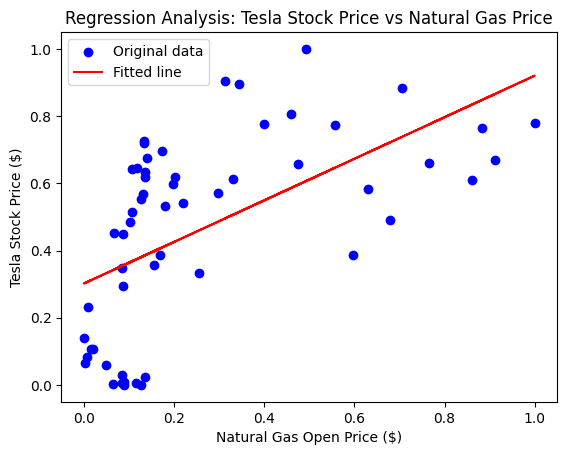

In [97]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression
X = merged_data['Normalized_Open'].values.reshape(-1, 1)  # Features (natural gas prices)
y = merged_data['Normalized_Tesla_Price'].values  # Target (Tesla prices)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Correlation coefficient (R squared)
r_squared = model.score(X, y)

slope, intercept, r_squared


# Assess the model's performance
# R-squared is a statistical measure of how close the data are to the fitted regression line
r_squared = model.score(X, y)  # Correlation coefficient (R-squared value)

# Display the model parameters
print("Slope (beta coefficient):", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

# Plotting the results
# Generate predictions across the observed range of natural gas prices
predictions = model.predict(X)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the regression line
plt.plot(X, predictions, color='red', label='Fitted line')

# Title and labels
plt.title('Regression Analysis: Tesla Stock Price vs Natural Gas Price')
plt.xlabel('Natural Gas Open Price ($)')
plt.ylabel('Tesla Stock Price ($)')

# Display legend
plt.legend()

# Show plot
plt.show()

Slope (beta coefficient): -0.4413108130012481
Intercept: 0.37251798854839163
R-squared: 0.3076348602760095


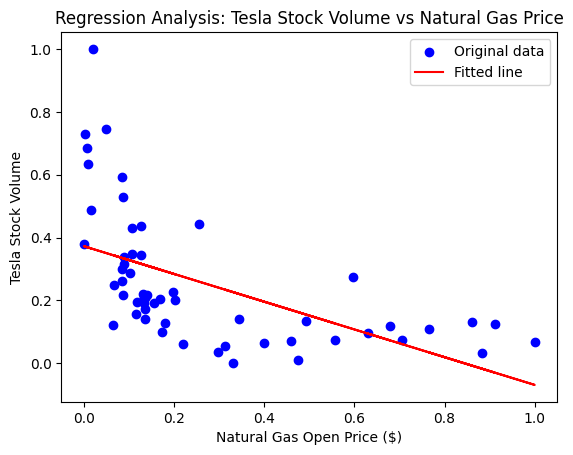

In [98]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression
X = merged_data['Normalized_Open'].values.reshape(-1, 1)  # Features (natural gas prices)
y = merged_data['Normalized_Tesla_Volume'].values  # Target (Tesla prices)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Correlation coefficient (R squared)
r_squared = model.score(X, y)

slope, intercept, r_squared


# Assess the model's performance
# R-squared is a statistical measure of how close the data are to the fitted regression line
r_squared = model.score(X, y)  # Correlation coefficient (R-squared value)

# Display the model parameters
print("Slope (beta coefficient):", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

# Plotting the results
# Generate predictions across the observed range of natural gas prices
predictions = model.predict(X)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the regression line
plt.plot(X, predictions, color='red', label='Fitted line')

# Title and labels
plt.title('Regression Analysis: Tesla Stock Volume vs Natural Gas Price')
plt.xlabel('Natural Gas Open Price ($)')
plt.ylabel('Tesla Stock Volume')

# Display legend
plt.legend()

# Show plot
plt.show()

In [99]:
merged_data

,Date,tesla_price,tesla_volume,Normalized_Tesla_Price,Normalized_Tesla_Volume,Open,Normalized_Open
0,2019-05-31,14.646818,1.926818e+08,0.001108,0.436990,2.597053,0.126590
1,2019-06-30,14.248000,1.612275e+08,0.000000,0.339225,2.337500,0.089594
2,2019-07-31,16.159091,1.359359e+08,0.005309,0.260614,2.310000,0.085674
3,2019-08-31,15.006364,9.143545e+07,0.002107,0.122299,2.167364,0.065342
4,2019-09-30,15.817000,1.024220e+08,0.004359,0.156447,2.524500,0.116249
5,2019-10-31,17.757391,1.533383e+08,0.009750,0.314704,2.331261,0.088704
6,2019-11-30,22.554000,1.184195e+08,0.023075,0.206170,2.654050,0.134715
7,2019-12-31,25.179524,1.481348e+08,0.030369,0.298530,2.295476,0.083603
8,2020-01-31,35.242857,2.916471e+08,0.058327,0.744591,2.048000,0.048328
9,2020-02-29,53.164211,3.738205e+08,0.108115,1.000000,1.853895,0.020660


In [100]:
merged_data.head()

,Date,tesla_price,tesla_volume,Normalized_Tesla_Price,Normalized_Tesla_Volume,Open,Normalized_Open
0,2019-05-31,14.646818,1.926818e+08,0.001108,0.436990,2.597053,0.126590
1,2019-06-30,14.248000,1.612275e+08,0.000000,0.339225,2.337500,0.089594
2,2019-07-31,16.159091,1.359359e+08,0.005309,0.260614,2.310000,0.085674
3,2019-08-31,15.006364,9.143545e+07,0.002107,0.122299,2.167364,0.065342
4,2019-09-30,15.817000,1.024220e+08,0.004359,0.156447,2.524500,0.116249


KNN VALUE WITH TESLA PRICE AND NATURAL GAS PRICE. MOREOVER RANDOM FOREST FOR TESLA PRICE AND NATURAL GAS PRICE.

> Add blockquote



In [102]:
from sklearn.model_selection import train_test_split

X = merged_data[['Normalized_Open']]  # Features
y = merged_data['Normalized_Tesla_Price']     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the kNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'kNN Mean Squared Error: {knn_mse}')


kNN Mean Squared Error: 0.04259659738621525


In [104]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)


# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

Random Forest Mean Squared Error: 0.05496629851300339


KNN VALUE WITH TESLA STOCK MARKET VOLUME AND NATURAL GAS PRICE. MOREOVER RANDOM FOREST FOR TESLA STOCK MARKET VOLUME AND NATURAL GAS PRICE.

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming merged_data is your DataFrame
# Prepare the data
X = merged_data[['Normalized_Tesla_Price',]]
y = merged_data['Normalized_Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [113]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}






In [114]:
# Initialize the models
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator for Random Forest
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Initialize GridSearchCV for kNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [115]:
# Get the best parameters and best estimator for kNN
best_params_knn = grid_search_knn.best_params_
best_knn = grid_search_knn.best_estimator_

# Make predictions using the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

# Calculate RMSE for both models
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"RMSE for Random Forest: {rmse_rf}")

print(f"Best parameters for kNN: {best_params_knn}")
print(f"RMSE for kNN: {rmse_knn}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
RMSE for Random Forest: 0.21519541193928732
Best parameters for kNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
RMSE for kNN: 0.22754035089332603


NOW, WE CALCULATE RANDOM FOREST AND KNN.

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming merged_data is your DataFrame
# Prepare the data
X = merged_data[['Normalized_Tesla_Volume',]]
y = merged_data['Normalized_Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the models
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator for Random Forest
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Initialize GridSearchCV for kNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best estimator for kNN
best_params_knn = grid_search_knn.best_params_
best_knn = grid_search_knn.best_estimator_

# Make predictions using the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

# Calculate RMSE for both models
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"RMSE for Random Forest: {rmse_rf}")

print(f"Best parameters for kNN: {best_params_knn}")
print(f"RMSE for kNN: {rmse_knn}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
RMSE for Random Forest: 0.204026838217283
Best parameters for kNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
RMSE for kNN: 0.20211113900522076
